# 🌞 Exploration 16 Main Project : 흐린 사진을 선명하게 🌞

## 🎯 루브릭 살펴보기 🎯

|루브릭 평가항목|세부기준|
|------|---|
|<span style="color:red">SRGAN을 이용하여 고해상도의 이미지 생성</span>|SRGAN을 통해 생성된 이미지가 잘 보이도록 하여 제출할 것|
|<span style="color:blue">다양한 해상도의 이미지에 대한 시각화를 통해 원본, SRGAN, interpolation 생성본을 비교 분석</span>|이미지의 특성과 super resolution 방법을 관련지어 생성결과를 체계적으로 분석|
|<span style="color:purple">저해상도 gif 동영상을 고해상도 동영상으로 성공적으로 변환</span>|두 gif 간 해상도 차이가 시각적으로 확인 가능|

## ❗ 안내 ❗

- 전체 프로젝트는 총 2개의 프로젝트로 나뉘어 있어서, **각각의 프로젝트를 그에 맞게 나누어 구성하였습니다.**
- Exploration 16-14에서 소개하는 프로젝트 순서대로 **P1, P2**라 하고 작업을 진행하였습니다.

## 🎆 프로젝트 순서 (P1-1) 🎆

- **기본적으로 아래 프로젝트 가이드에 입각하여 파트를 나누었습니다.**
- **A** : 프로젝트 1-1의 2. 까지
- **B** : 프로젝트 1-1의 4. 까지
- **C** : 프로젝트 1-1의 6. 까지

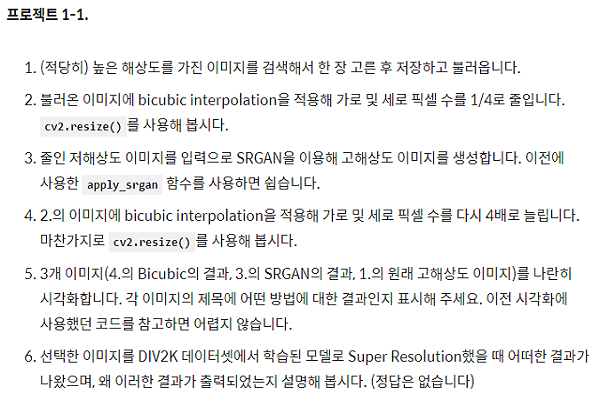

## A.

- 노드의 테스트 이미지를 고르는 과정에서 일반적으로 **DIV2K의 학습 데이터셋과 비슷한 종류의 이미지**를 쓰기를 권하고 있다.
- 보통 자연, 동물, 건물 등의 이미지가 학습에 사용되었다.
- 특정 데이터셋에서만 학습되어 일반적으로 결과가 좋지 않을 가능성이 존재할 수 있다.
- 우선, 필요한 라이브러리를 불러오는 것부터 시작한다.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

print('라이브러리 불러오기 수행')

라이브러리 불러오기 수행


- **적당히 높은 해상도를 가진 이미지를 선정**하여 클라우드에 저장하고 불러온다.

(512, 910, 3)


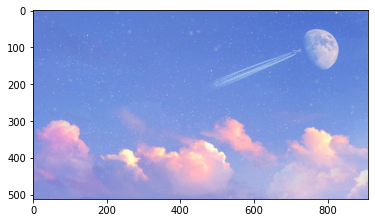

In [2]:
file_path = os.getenv('HOME') + '/aiffel/super_resolution/image1-1.png'

img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(img)
plt.imshow(img)
print(img.shape)

- **cv2.resize()**를 활용하여, 불러온 이미지에 **bicubic interpolation**을 적용해 가로 및 세로 픽셀 수를 1/4로 줄인다.
- 이미지의 가로와 세로, 즉 img_shape[0], img_shape[1]에 각각 4를 나누어준 형태로 위 이미지를 resize하고, bicubic interpolation을 적용한 결과를 bicubic_img에 적용하였다.
- 픽셀 수를 줄이기 전보다 전체적인 이미지의 화질이 낮아졌다.

(128, 227, 3)


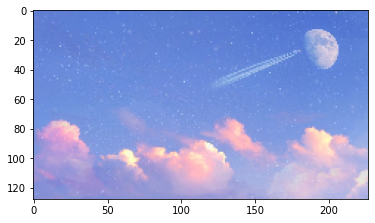

In [3]:
bicubic_img = cv2.resize(
    img,
    dsize=(img.shape[1]//4,img.shape[0]//4),
interpolation=cv2.INTER_CUBIC,
)
plt.imshow(bicubic_img)
print(bicubic_img.shape)

## B.

- 줄인 **저해상도 이미지를 입력**으로 SRGAN을 이용해 고해상도 이미지를 생성한다. 해당 과정에서 **apply_srgan** 함수를 사용한다.
- apply_srgan 함수를 사용하기 위해서는 **학습된 SRGAN 모델이 필요**하다.
- 아래와 같이 학습된 SRGAN을 클라우드에 저장하고 불러온다.

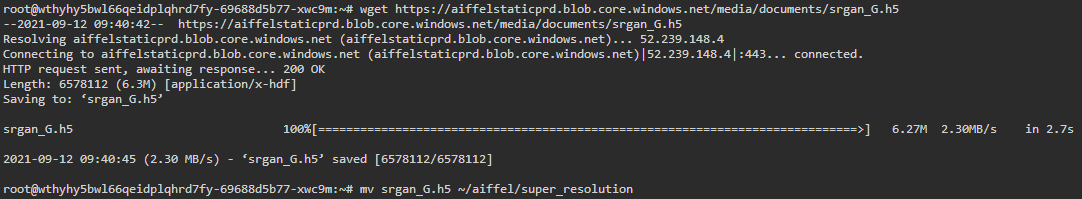

- SRGAN은 크게 Generator, Discriminator 신경망으로 구성되어 있다.
- 여기서 우리가 풀어야 할 문제와 직결되는 신경망은 **Generator**이다.
- 우리가 다운받은 **srgan_G.h5**가 바로 Generator 역할을 한다.

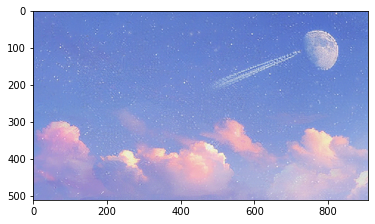

In [4]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr_img= apply_srgan(bicubic_img) # srgan 적용된 image
plt.imshow(srgan_hr_img)

- 이제 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘려 원래 크기로 되돌린다.

(512, 908, 3)


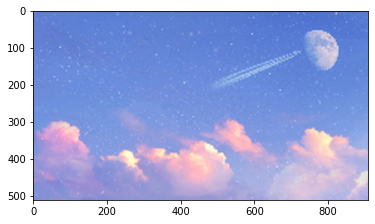

In [5]:
bicubic_img = cv2.resize(
    bicubic_img,
    dsize=(bicubic_img.shape[1]*4,bicubic_img.shape[0]*4),
interpolation=cv2.INTER_CUBIC,
)
plt.imshow(bicubic_img)
print(bicubic_img.shape)

## C.

- 3개의 이미지(**Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지**)를 시각화하고 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해준다.
- 3개의 이미지를 한 코드블록에서 결과로 출력할 수 있도록 subplot을 활용한다.

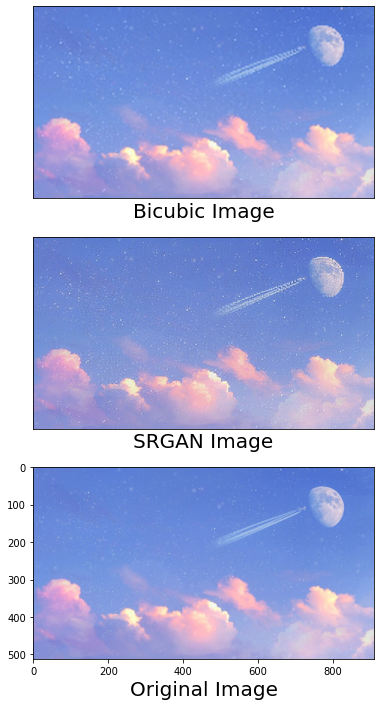

In [6]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.imshow(bicubic_img)
plt.xlabel('Bicubic Image',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(3,1,2)
plt.imshow(srgan_hr_img)
plt.xlabel('SRGAN Image',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(3,1,3)
plt.imshow(img)
plt.xlabel('Original Image',fontsize=20)


# plt.set_ticks()
# ax = plt.gca()
# ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

# plt.grid(True)
plt.show()

- **선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 살펴본다.**

In [7]:
# 특정 영역을 잘라내는 함수를 정의한다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

- 원본 이미지 상에서 가장 핵심이 되는 개체를 집중적으로 살펴보기 위해 좌상단 좌표를 활용한다.
- 핵심 개체인 달 부분이 드러나도록 적절히 left_top의 좌표를 설정하여 잘라낸다.

Text(0.5, 1.0, 'Original')

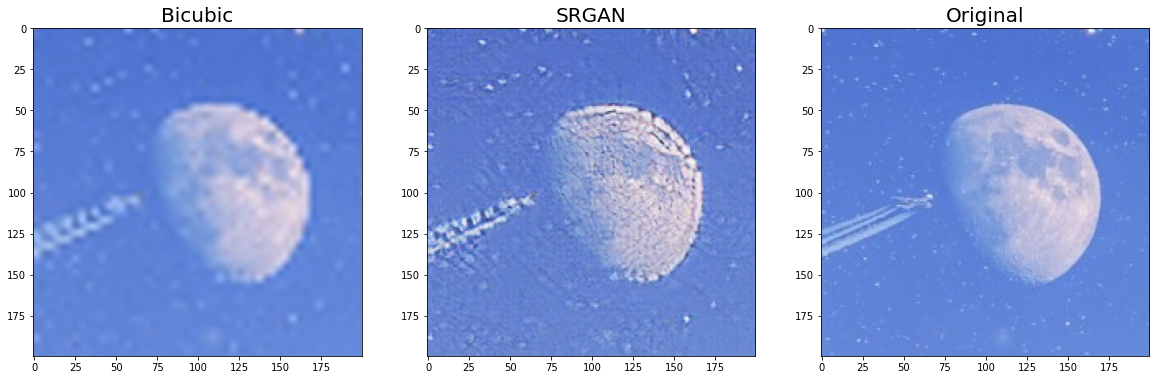

In [8]:
left_top = (5, 660)
crop_bicubic_hr = crop(bicubic_img, left_top)
crop_srgan_hr = crop(srgan_hr_img, left_top)
crop_hr = crop(img, left_top)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=20)
plt.subplot(1,3,2); plt.imshow(crop_srgan_hr); plt.title("SRGAN", fontsize=20)
plt.subplot(1,3,3); plt.imshow(crop_hr); plt.title("Original", fontsize=20)

### 💚 결과 분석 💚

- **Bicubic**은 bicubic interpolation을 적용한 이미지이다.
- **SRGAN**은 학습된 SRGAN의 Generator를 적용한 이미지이다.
- **Original**은 처음에 불러온 고해상도 이미지이다.
- 상기 결과 분석은 고해상도였던 이미지를 저해상도로 변환한 다음, 다시 고해상도로 복원했다는 전제하에 이루어진다.

- **Bicubic 이미지는 Original 이미지에 비해 매우 흐릿하게 달이 보인다. 이는 세밀한 정보를 찾는 데 어려움으로 작용한다.**
- 한편 SRGAN 이미지는 Bicubic 이미지에 비해 달의 형상이 선명하게 나타난다.
- SRGAN은 Bicubic에 비해 어떠한 객체를 더욱 선명하게 드러내준다.

## 🎆 프로젝트 순서 (P1-2) 🎆

- **기본적으로 아래 프로젝트 가이드에 입각하여 파트를 나누었습니다.**
- **A** : 프로젝트 1-2의 3. 까지
- **B** : 프로젝트 1-2의 5. 까지

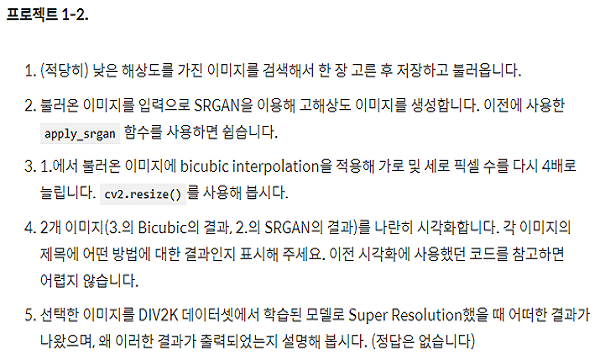

## A.

- 프로젝트 1-1과는 달리, 초기부터 낮은 해상도의 이미지를 선정하여 고해상도 이미지를 생성한다는 점에서 차이가 있다.
- **적당히 낮은 해상도를 가진 이미지를 선정**하여 클라우드에 저장하고 불러온다.

(360, 400, 3)


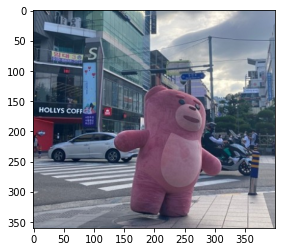

In [9]:
file_path2 = os.getenv('HOME') + '/aiffel/super_resolution/image1-2.png'

img2 = cv2.imread(file_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# cv2.imshow(img2)
plt.imshow(img2)
print(img2.shape)

- 위 이미지를 입력으로 학습된 SRGAN을 이용해 고해상도 이미지를 생성한다. 역시 **apply_srgan** 함수를 활용한다.
- apply_srgan 함수는 아까 프로젝트 1-1에서 만든 것과 동일하게 적용되므로 여기에서는 생략한다.

(1440, 1600, 3)


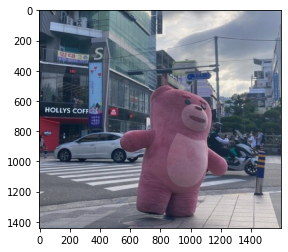

In [10]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

srgan_img2= apply_srgan(img2) # srgan 적용된 image
plt.imshow(srgan_img2)
print(srgan_img2.shape)

- 아까 처음에 불러왔던 이미지에 **bicubic interpolation**을 적용해 가로 및 세로 픽셀 수를 4배 늘린다.

(1440, 1600, 3)


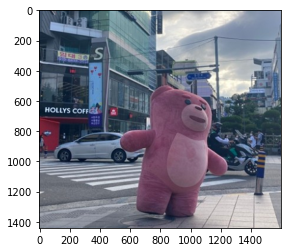

In [11]:
bicubic_img2 = cv2.resize(
    img2,
    dsize=(img2.shape[1]*4,img2.shape[0]*4),
interpolation=cv2.INTER_CUBIC,
)
plt.imshow(bicubic_img2)
print(bicubic_img2.shape)

## B.

- 2개의 이미지(**Bicubic의 결과, SRGAN의 결과**)를 나란히 시각화하고, 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해준다.
- 2개의 이미지를 한 코드블록에서 결과로 출력할 수 있도록 subplot을 활용한다.

Text(0.5, 1.0, 'Bicubic')

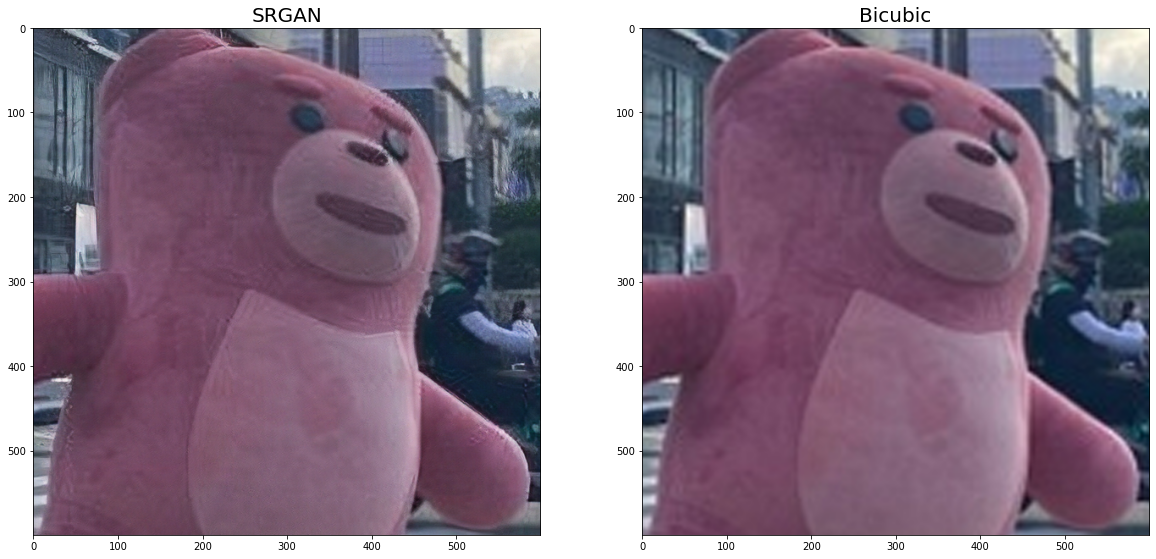

In [12]:
def crop2(image, left_top, x=600, y=600):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]
left_top = (500, 660)
crop_srgan = crop2(srgan_img2, left_top)
crop_bic = crop2(bicubic_img2, left_top)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(crop_srgan); plt.title("SRGAN", fontsize=20)
plt.subplot(1,2,2); plt.imshow(crop_bic); plt.title("Bicubic", fontsize=20)

- **선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 살펴본다.**

- 앞에서 살펴보았던 프로젝트 1-1과는 달리 **Bicubic, SRGAN에서 모두 그럴듯하게 복원되었다.**
- SRGAN 이미지는 Bicubic 이미지에 비해 선명하지만 노이즈 문제가 있다. (Ex. 격자 무늬)
- Bicubic 이미지는 SRGAN 이미지에 비해 다소 흐릿하지만 노이즈가 상대적으로 적어 부드럽다.

## 🎆 프로젝트 순서 (P2) 🎆

- 프로젝트 P2에서는 단일 이미지에 대해 적용했던 것과는 달리 **영상 단위**로 적용한다.
- 이전에 사용했던 SRGAN을 이용해서 한 프레임씩 고해상도 이미지로 변환시켜 모든 프레임에 대해 적용하고, 이들을 합쳐 하나의 영상으로 만든다.
- 우선, 각 프레임들을 모아 gif 파일을 만들기 위해 **imageio** 라는 라이브러리가 필요하다. Cloud Shell을 이용하여 설치해주었다.
- 명령어를 입력했을 때 **Requirement already satisfied** 라는 게 떴다면 imageio 라이브러리가 설치되어 있다는 의미이다.

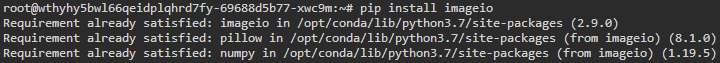

- 노드에서는 저해상도 gif 파일을 구글 드라이브로 제공했지만, 이번 프로젝트에서는 **구글링을 통해 적당히 낮은 해상도를 가진 임의 gif 파일**을 활용한다.
- 아래 코드를 입력하여 gif 파일을 불러와 gif 파일이 가진 프레임 수와 크기를 살펴본다.

In [13]:
file_path3 = os.getenv('HOME') + '/aiffel/super_resolution/image2-1.gif'
# 다운받은 파일의 경로 설정
gif = cv2.VideoCapture(file_path3)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

# gif 프레임 수와 크기 살펴보기
print("frame 수는", len(frames), '입니다')
print("frame 크기는", (frames[0].shape), '입니다')

frame 수는 13 입니다
frame 크기는 (250, 450, 3) 입니다


- **Bicubic Interpolation**을 이용해 각각의 가로 및 세로의 픽셀 수를 4배로 늘려준다.

In [14]:
frames_sr_bicubic = []
for frame in frames:
    frames_sr_bicubic.append(cv2.resize(
        frame, 
        dsize=(frame.shape[1]*4, frame.shape[0]*4), 
        interpolation=cv2.INTER_CUBIC
    ))

- **SRGAN**을 이용해 각각의 가로 및 세로의 픽셀 수를 4배로 늘려준다.
- apply_srgan 함수는 이미 위에서 만들었으므로 다시 def 하지 않고 생략한다.

In [15]:
frames_sr_srgan = []
for frame in frames:
    frames_sr_srgan.append(apply_srgan(frame))

- Bicubic Interpolation으로 픽셀 수를 늘린 후의 프레임의 크기가 정확히 4배 증가한 것을 확인할 수 있다.
- 프레임의 수는 변동이 없다.

In [16]:
print("Bicubic frame 수는", len(frames_sr_bicubic), '입니다')
print("Bicubic frame 크기는", (frames_sr_bicubic[0].shape), '입니다')

Bicubic frame 수는 13 입니다
Bicubic frame 크기는 (1000, 1800, 3) 입니다


- 같은 방법으로 SRGAN으로 픽셀 수를 늘린 후의 프레임의 크기도 똑같이 4배 증가하였다.
- 역시 프레임의 수는 변동이 없다.

In [17]:
print("SRGAN frame 수는", len(frames_sr_srgan), '입니다')
print("SRGAN frame 크기는", (frames_sr_srgan[0].shape), '입니다')

SRGAN frame 수는 13 입니다
SRGAN frame 크기는 (1000, 1800, 3) 입니다


- 이제 이전에 설치 및 불러오기 했던 **imageio** 라이브러리를 사용한다.
- imageio 라이브러리를 활용하여 각각의 프레임들을 모아 gif 파일을 생성한다.

In [18]:
import imageio

gif_path = os.getenv('HOME') + '/aiffel/super_resolution'

imageio.mimsave(os.path.join(gif_path, 'aiffel_hr_bicubic.gif'), frames_sr_bicubic)
imageio.mimsave(os.path.join(gif_path, 'aiffel_hr_srgan.gif'), frames_sr_srgan)

- 마지막으로, 생성된 gif 파일을 시각화함으로 마무리한다.

In [19]:
from IPython.display import Image as show_gif

# 원래 가져온 gif 이미지
# show_gif(os.path.join(gif_path, 'image2-1.gif'), width=600) # width 는 적당히 큰 값으로 설정해주세요

In [20]:
# Bicubic이 적용된 gif 이미지
# show_gif(os.path.join(gif_path, 'aiffel_hr_bicubic.gif'), width=600) # 위에서 설정한 width와 같은 값으로 설정해주세요

In [21]:
# SRGAN이 적용된 gif 이미지
# show_gif(os.path.join(gif_path, 'aiffel_hr_srgan.gif'), width=600) # 위에서 설정한 width와 같은 값으로 설정해주세요

- 세 이미지를 비교해보았을 때, **SRGAN을 적용한 이미지에서 캐릭터의 얼굴색의 변화가 있었다.**
- 대체로 Bicubic과 SRGAN 모두 잘 복원된 것 같다.

## 🎆 프로젝트 순서 (추가 탐구 및 회고) 🎆

1. 추가 탐구 : PSNR과 SSIM
2. 프로젝트 회고

## 1. 추가 탐구 : PSNR과 SSIM

|구분|PSNR|SSIM|
|------|------|------|
|특징|수치가 높을수록 원본 영상에 비해 손실이 적다|수치가 높을수록 원본 영상의 품질에 가깝다|
|척도|높을수록 좋다|높을수록 좋다|

- 앞서 프로젝트 1-2에서 작업했던 귀여운 핑크 곰돌이를 다시 불러와본다.

(360, 400, 3)


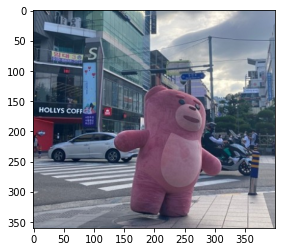

In [22]:
file_path2 = os.getenv('HOME') + '/aiffel/super_resolution/image1-2.png'

img2 = cv2.imread(file_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# cv2.imshow(img2)
plt.imshow(img2)
print(img2.shape)

- 필요한 라이브러리를 한 번에 import한다.

In [23]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

- 우선, 같은 이미지로 PSNR과 SSIM을 계산해 본다.
- PSNR은 상한값이 없고, SSIM은 0과 1 사이의 값을 가진다.
- 아래와 같이 **같은 이미지에 대한 비교에서는 모두 최댓값으로 출력되었다.**

In [24]:
print("**같은 이미지에 대한 PSNR & SSIM**")
print("PSNR :", peak_signal_noise_ratio(img2, img2))
print("SSIM :", structural_similarity(img2, img2, multichannel=True))

**같은 이미지에 대한 PSNR & SSIM**
PSNR : inf
SSIM : 1.0


/opt/conda/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


- 대표적으로 노드에서 소개된 bicubic interpolation을 기반으로 픽셀 수를 줄였다 다시 원래대로 복원시켜 처리한 이미지에 대해 각각 원본 이미지와의 PSNR, SSIM을 계산하여 시각화한다.

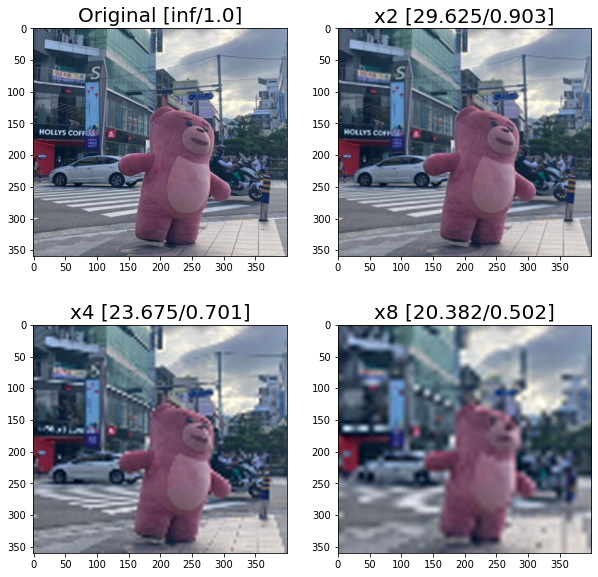

In [25]:
import cv2

hr_shape = img2.shape[:2]

# 이미지를 특정 크기로 줄이고 다시 늘리는 과정을 함수로 정의합니다.
def interpolation_xn(image, n):
    downsample = cv2.resize(
        image,
        dsize=(hr_shape[1]//n, hr_shape[0]//n)
    )
    upsample = cv2.resize(
        downsample,
        dsize=(hr_shape[1], hr_shape[0]),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample

lr2_img2 = interpolation_xn(img2, 2) # 1/2로 줄이고 다시 복원
lr4_img2 = interpolation_xn(img2, 4) # 1/4로 줄이고 다시 복원
lr8_img2 = interpolation_xn(img2, 8) # 1/8로 줄이고 다시 복원

images = [img2, lr2_img2, lr4_img2, lr8_img2]
titles = ["Original", "x2", "x4", "x8"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(img2, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(img2, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

- interpolation_xn 함수의 인자 n의 값이 클수록 시각화 결과에 따른 PSNR과 SSIM의 값이 모두 눈에 띄게 감소하였다. 즉, 해상도를 크게 낮췄다가 원래 크기로 복원할수록 복원품질이 떨어짐을 위 4개의 시각화를 통해 살펴볼 수 있다.
- PSNR과 SSIM은 **이미지나 영상의 품질을 측정하는 척도**로 사용된다.
- 더 자세히 알고 싶다면 아래 링크를 참고하자 : https://blog.naver.com/mincheol9166/221771426327
- Github에 프로젝트를 제출하려면 변환된 ipynb 파일의 용량이 25MB를 넘을 수 없다. 이로 인해 드라이브 링크로 결과물을 대체한다.
- 생성한 Bicubic, SRGAN 변환 gif 파일 드라이브 링크 : https://drive.google.com/drive/folders/1calxgHVsGn3Kp9D2424J3C3ofaGy6mrL

## 2. 프로젝트 회고

### 💚 알게 된 점 💚

- SRGAN을 활용하면 이미지를 대체로 밝고 선명하게 표현할 수 있었다.
- 어떤 gif 파일을 사용하느냐에 따라 frame 수가 달라진다. 여기서 frame 수는 몇 장의 사진을 이어붙여 만든 gif 파일인지를 의미하는 것 같다.
- PSNR과 SSIM을 통해 이미지나 영상의 품질을 수치적으로 알아볼 수 있었다.

### 🧡 아쉬운 점 🧡

- 프로젝트 2에서 생성한 Bicubic, SRGAN gif 파일과 원본 이미지 간의 PSNR과 SSIM을 알아보고 싶었지만, 시도해보지 못했다.

### 🖤 루브릭 자가평가 🖤

- SRGAN을 이용하여 오류 없이 고해상도의 이미지를 생성하였다.
- 다양한 크기의 이미지를 시각화함으로 원본, Bicubic, SRGAN 생성본에 대한 비교분석 내용이 있다.
- 프로젝트 2를 기반으로 저해상도 gif(250, 450, 3)를 고해상도 gif(1000, 1800, 3)로 성공적으로 변환하였다.